In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-simple-linear-regression/SalaryPrediction.csv


In [2]:
df = pd.read_csv('/kaggle/input/salary-prediction-simple-linear-regression/SalaryPrediction.csv')
df.rename(columns={'Experience Years': 'Years'}, inplace=True)
df.head()

,Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [3]:
ols_data = df[["Years", "Salary"]]
ols_formula = "Salary ~ Years"

In [4]:
from statsmodels.formula.api import ols

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     823.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           2.32e-27
Time:                        10:31:43   Log-Likelihood:                -400.39
No. Observations:                  40   AIC:                             804.8
Df Residuals:                      38   BIC:                             808.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.567e+04   1920.100     13.371      0.000    2.18e+04    2.96e+04
Years       9523.6505    331.910     28.693      0.000    8851.734    1.02e+04
==============================================================================
Omnibus:                        3.473   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.767
Skew:                           0.194   Prob(JB):                        0.413
Kurtosis:                       2.046   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
x = ols_data["Years"]
fitted_values = model.predict(x)

In [7]:
residuals = model.resid

<Axes: xlabel='Years', ylabel='Salary'>

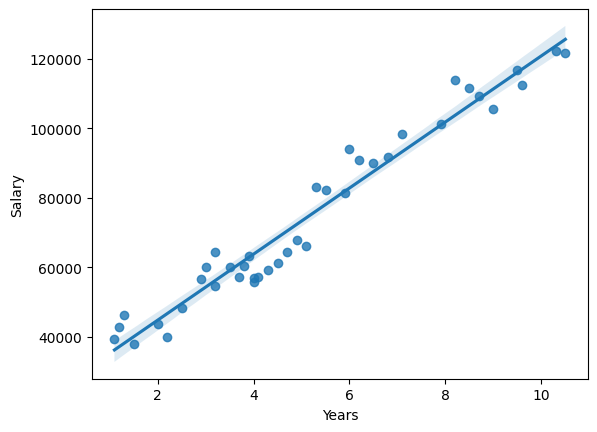

In [8]:
sns.regplot(x = "Years", y = "Salary", data = ols_data)

From the above graph, the line represents the predicted relationship between the number of years of experience and the Salary earned